# Iris Classification: Preprocessing and Model Training
This notebook covers:
- Loading the Iris dataset
- Preprocessing and train-test splitting
- Training Logistic Regression and Random Forest models
- Evaluating the performance of both models

## Import

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load

In [2]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame

# Save to CSV
df.to_csv("iris.csv", index=False)

print("Iris dataset saved as 'iris.csv'")


Iris dataset saved as 'iris.csv'


In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# Add target names for readability
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

In [5]:
df['target_name'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Visualise

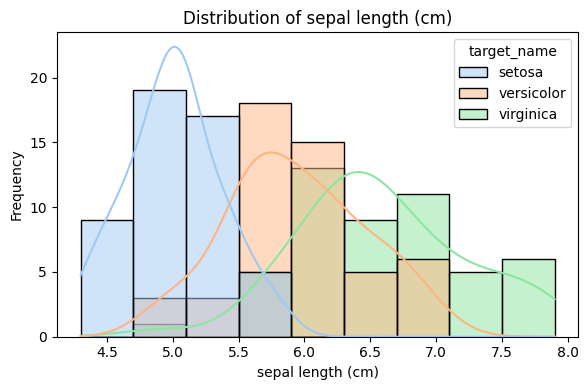

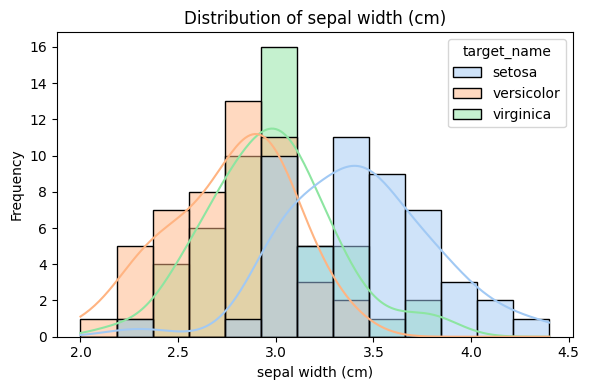

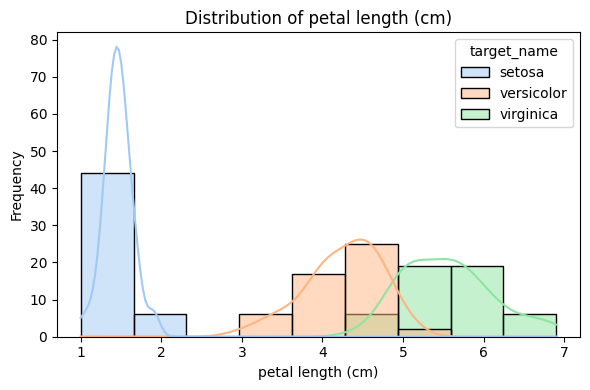

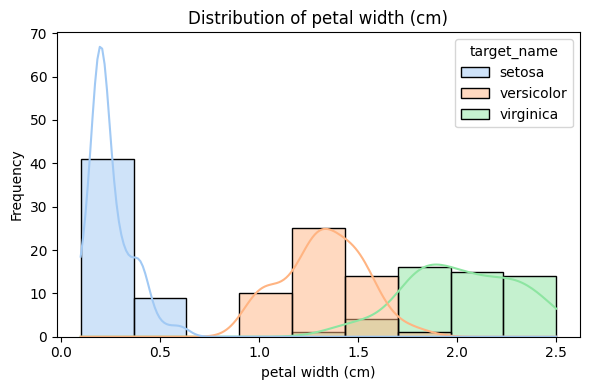

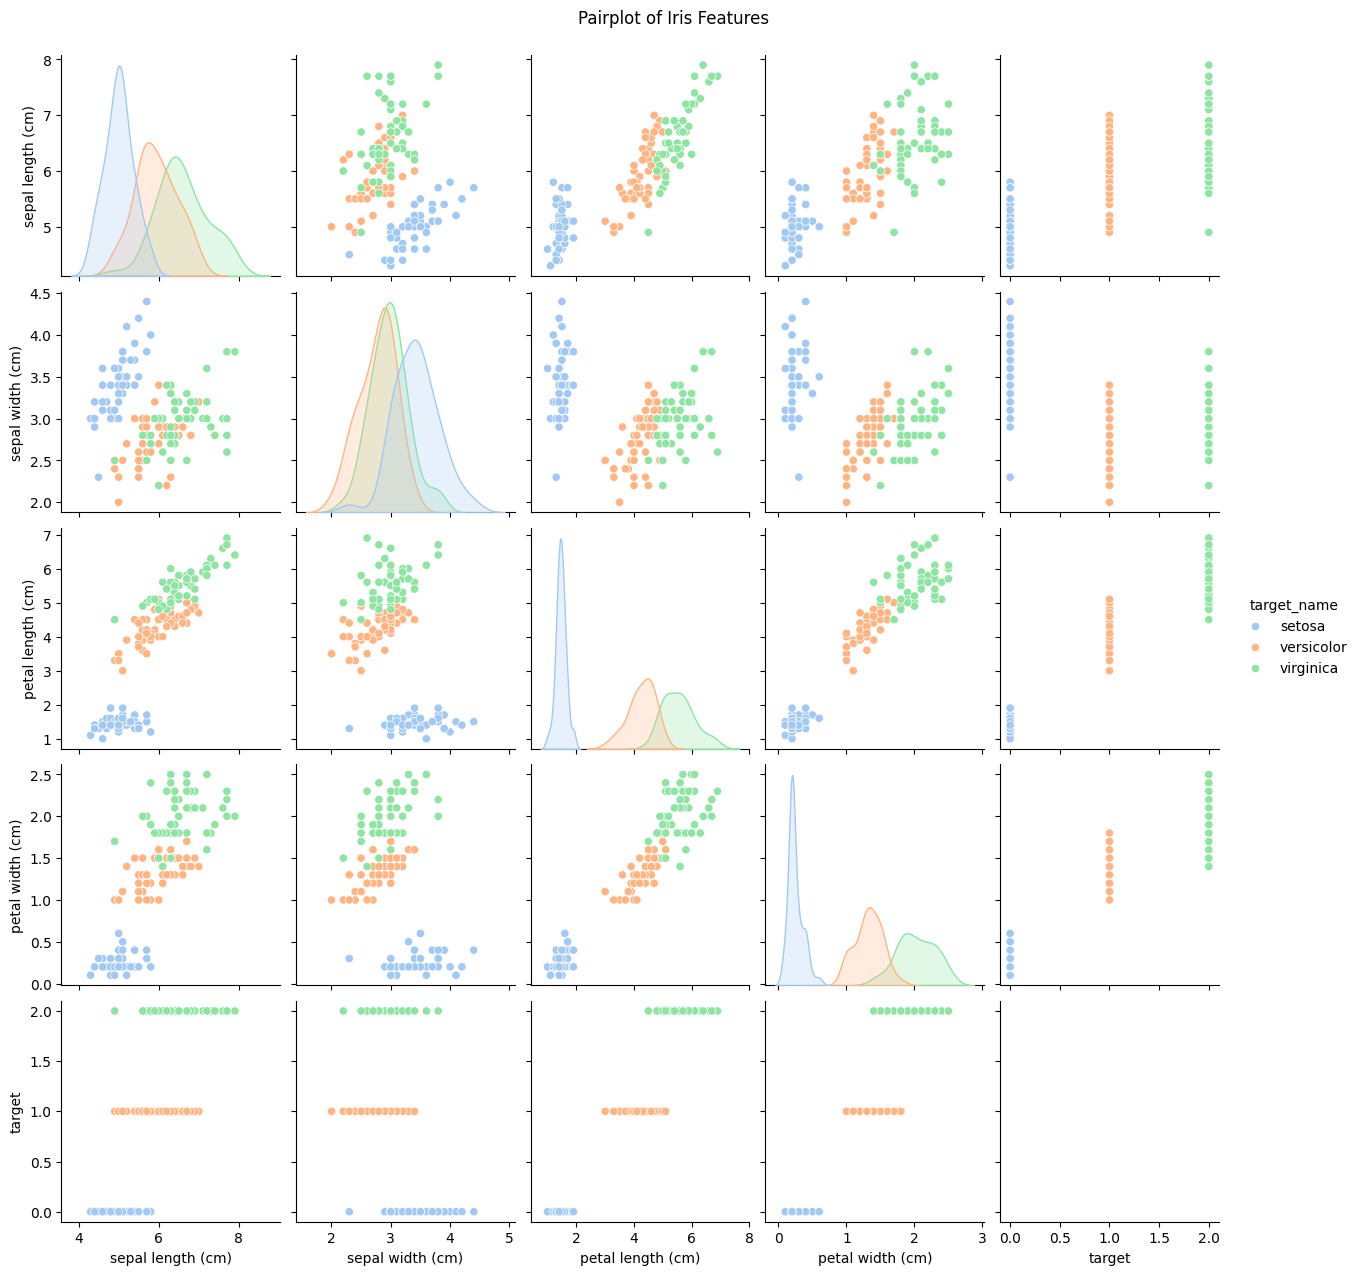

In [8]:
# Distribution plots for each feature
for col in iris.feature_names:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue="target_name", kde=True, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Pairplot for feature interaction colored by species
sns.pairplot(df, hue="target_name", palette="pastel")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

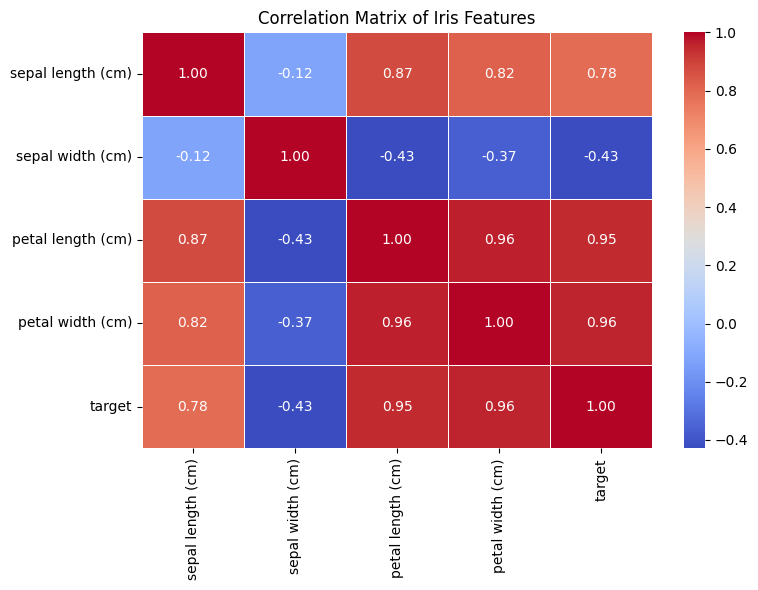

In [9]:
# Compute correlation matrix (only numeric columns)
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Iris Features")
plt.tight_layout()
plt.show()

## Preprocess

### check and handle missing/ null values

In [10]:
print("\nChecking for missing values...")
missing = df.isnull().sum()
if missing.any():
    print("Missing values found. Filling with column mean.")
    df.fillna(df.mean(numeric_only=True), inplace=True)
else:
    print("No missing values found.")


Checking for missing values...
No missing values found.


In [11]:
# # Check and remove duplicate rows
# print("\nChecking for duplicate rows...")
# duplicates = df.duplicated().sum()
# if duplicates > 0:
#     print(f"Found {duplicates} duplicate rows. Removing them.")
#     df = df.drop_duplicates()
# else:
#     print("No duplicate rows found.")

## Split Dataset

In [12]:
# Split features and labels
X = df[iris.feature_names]
y = df['target']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training

In [15]:
# Define models and hyperparameter grids

models = {
    "Logistic Regression": (LogisticRegression(), {
        'C': [0.1, 1, 10],
        'max_iter': [100, 200]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [100]
    }),
    "SVM": (SVC(probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 3, 5]
    }),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    })
}


In [16]:
# Train and evaluate models
results = []

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=3, scoring='accuracy')

    if name in ["Random Forest", "Decision Tree", "Gradient Boosting"]:
        grid.fit(X_train, y_train)
        preds = grid.predict(X_test)
    else:
        grid.fit(X_train_scaled, y_train)
        preds = grid.predict(X_test_scaled)

    best_model = grid.best_estimator_
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": round(accuracy, 4),
        "F1 Score": round(f1, 4)
    })



## Results

In [17]:
# Print results
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n")
print(results_df.to_string(index=False))


Model Comparison:

              Model                                Best Params  Accuracy  F1 Score
Logistic Regression                 {'C': 10, 'max_iter': 100}    1.0000    1.0000
      Random Forest                      {'n_estimators': 100}    0.9000    0.8997
                SVM               {'C': 1, 'kernel': 'linear'}    1.0000    1.0000
      Decision Tree                           {'max_depth': 3}    0.9667    0.9666
  Gradient Boosting {'learning_rate': 0.1, 'n_estimators': 50}    0.9667    0.9666
